In [2]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [3]:
from tensorflow import keras
keras.__version__

'2.7.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print('X_train_full shape is:', X_train_full.shape)
print('y_train_full shape is:', y_train_full.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train_full shape is: (60000, 28, 28)
y_train_full shape is: (60000,)
X_test shape is: (10000, 28, 28)
y_test shape is: (10000,)


In [6]:
print('X_train_full type is:', X_train_full.dtype)
print('y_train_full type is:', y_train_full.dtype)
print('X_test type is:', X_test.dtype)
print('y_test type is:', y_test.dtype)

X_train_full type is: uint8
y_train_full type is: uint8
X_test type is: uint8
y_test type is: uint8


In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
print('X_valid shape is:', X_valid.shape)
print('X_train shape is:', X_train.shape)
print('y_valid shape is:', y_valid.shape)
print('y_train shape is:', y_train.shape)

X_valid shape is: (5000, 28, 28)
X_train shape is: (55000, 28, 28)
y_valid shape is: (5000,)
y_train shape is: (55000,)


In [9]:
print('X_valid type is:', X_valid.dtype)
print('X_train type is:', X_train.dtype)
print('y_valid type is:', y_valid.dtype)
print('y_train type is:', y_train.dtype)

X_valid type is: float64
X_train type is: float64
y_valid type is: uint8
y_train type is: uint8


In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

Creating the model

In [12]:
model = keras.models.Sequential([
    # First layer and add it to the model
    keras.layers.Flatten(input_shape=[28, 28]),
    # Add Dense hidden layer with 300 neurons
    keras.layers.Dense(300, activation="relu"),
    # Add second Dense hidden with 100 neurons
    keras.layers.Dense(100, activation="relu"),
    # Add Dense ouput layer with 10 neurons
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Layers

In [14]:
model.layers

In [15]:
model.layers[3].name

'dense_2'

In [16]:
model.get_layer('dense_2').name

'dense_2'

Weigths

In [17]:
weights = model.get_weights()[0]

In [18]:
biases = model.get_weights()[1]

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

Compling the model

In [21]:
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Training and evaluating the model

In [22]:
history = model.fit(x = X_train,
                    y = y_train,
                    epochs= 50, 
                    batch_size = 32,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7210 - accuracy: 0.7640 - val_loss: 0.5086 - val_accuracy: 0.8310
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4877 - accuracy: 0.8304 - val_loss: 0.4618 - val_accuracy: 0.8402
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4428 - accuracy: 0.8443 - val_loss: 0.4160 - val_accuracy: 0.8588
Epoch 4/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4147 - accuracy: 0.8542 - val_loss: 0.3975 - val_accuracy: 0.8652
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3947 - accuracy: 0.8594 - val_loss: 0.3946 - val_accuracy: 0.8640
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3787 - accuracy: 0.8662 - val_loss: 0.3784 - val_accuracy: 0.8712
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3656 - accuracy: 0.8715 - val_loss: 0.3818 - val_accuracy:

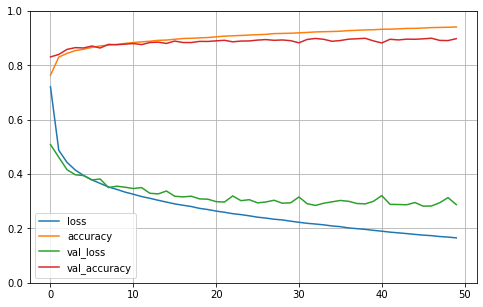

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [27]:
# Generalization error
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 64.5377 - accuracy: 0.8570


[64.53765106201172, 0.8569999933242798]

Making predictions

In [37]:
X_new = X_test[:2]
X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [44]:
y_pred = model.predict(X_new)
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
import numpy as np
class_pred = np.argmax(y_pred, axis=-1)
class_pred

array([9, 2], dtype=int64)

In [89]:
class_names_pred = [class_names[a] for a in class_pred]
class_names_pred

['Ankle boot', 'Pullover']

Guardando el modelo

In [91]:
model.save('ann_classifier_model.h5')